# Traffic Light Detection and Classification
Using a pre-trained model to detect objects in an image.

In [2]:
import os
import sys
import time

import numpy as np
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from glob import glob
%matplotlib inline

# imports from the object detection module
sys.path.append('./models/research')
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

## Model preparation

In [3]:
dataset_dir = 'data'
PATH_TO_IMAGES_DIR = 'data/test_images'
EVAL_IMAGES_DIR = PATH_TO_IMAGES_DIR + '_inferred'

model_name = 'ssd_mobilenet'
model_path = 'models/frozen_%s/frozen_inference_graph.pb' % model_name
PATH_TO_LABELS = 'label_map.pbtxt'

NUM_CLASSES = 4

## Loading label map

Label maps map indices to category names, so that when our convolution network predicts 2, we know that this corresponds to Red. Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine.

In [4]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, 
                                                            max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)


{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Red'}, 3: {'id': 3, 'name': u'Yellow'}, 4: {'id': 4, 'name': u'off'}}


In [5]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


## Detection

In [6]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    od_graph_def = tf.GraphDef()

    with tf.gfile.GFile(model_path, 'rb') as fid:        
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [7]:
print(os.path.join(PATH_TO_IMAGES_DIR, '*.jpg'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_IMAGES_DIR, '*.jpg'))
TEST_IMAGE_PATHS = sorted(TEST_IMAGE_PATHS)
print("Length of test images:", len(TEST_IMAGE_PATHS))

data/test_images/*.jpg
('Length of test images:', 29)


In [8]:
plot = True
min_score_thresh = .30


def draw_a_detection_result(boxes, scores, classes, num, image_np, t_elapsed):
    boxes = np.squeeze(boxes)
    scores = np.squeeze(scores)
    classes = np.squeeze(classes).astype(np.int32)

    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np, boxes, classes, scores,
        category_index,
        min_score_thresh=min_score_thresh,
        use_normalized_coordinates=True,
        line_thickness=3)

    if plot:
        plt.figure(figsize=(12, 8))
        plt.imshow(image_np)
        plt.show()

        for i in range(boxes.shape[0]):
            if scores is None or scores[i] > min_score_thresh:
                class_name = category_index[classes[i]]['name']
                print('{}'.format(class_name), scores[i])
                print("ms", t_elapsed * 1000, "\n")


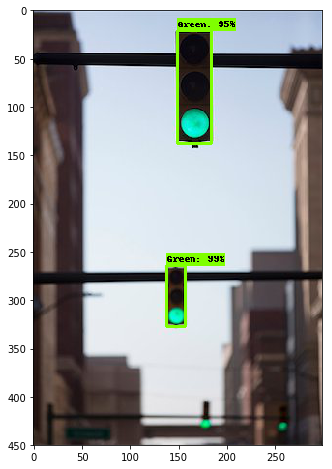

('Green', 0.9986926)
('ms', 1198.4798908233643, '\n')
('Green', 0.95677435)
('ms', 1198.4798908233643, '\n')


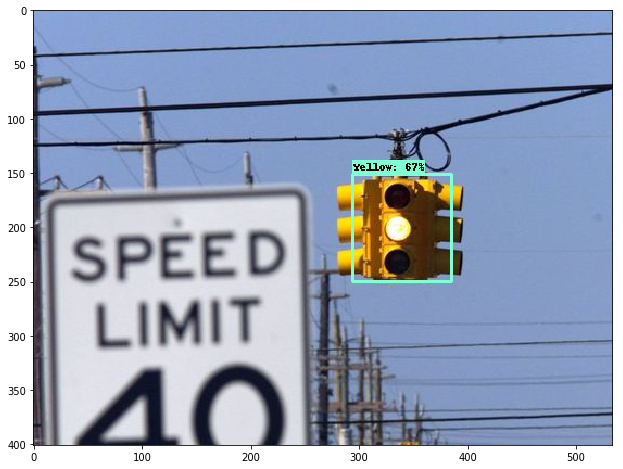

('Yellow', 0.67815095)
('ms', 12.454986572265625, '\n')


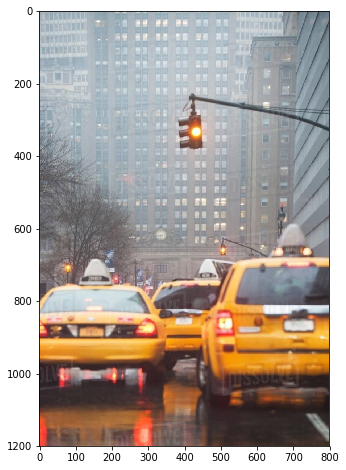

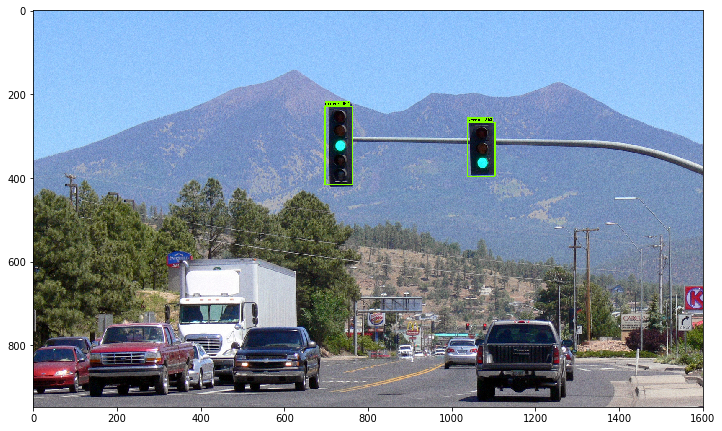

('Green', 0.9991943)
('ms', 18.166065216064453, '\n')
('Green', 0.64554876)
('ms', 18.166065216064453, '\n')


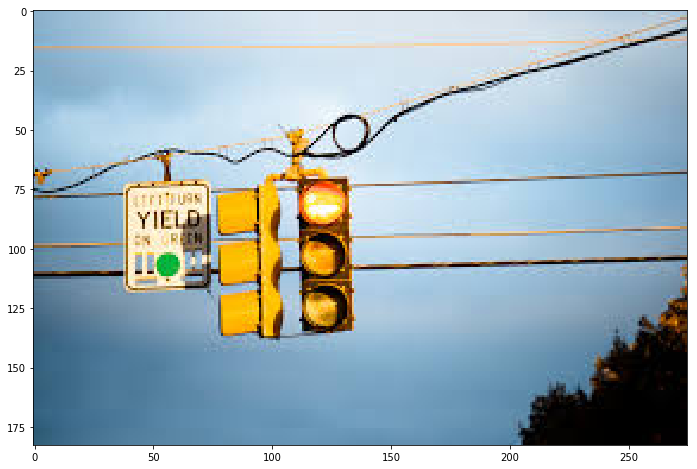

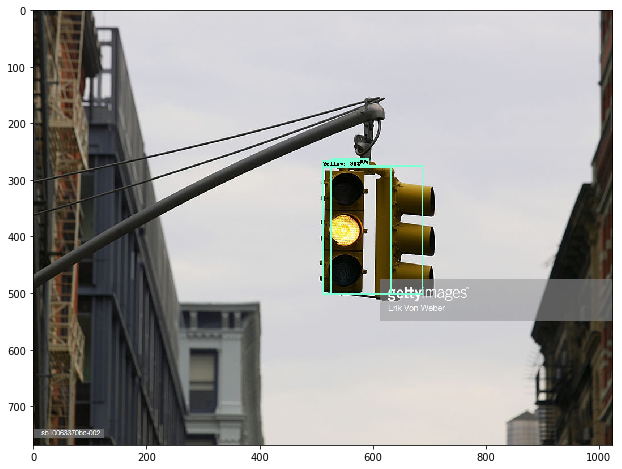

('Yellow', 0.9811226)
('ms', 12.416839599609375, '\n')
('Yellow', 0.381941)
('ms', 12.416839599609375, '\n')


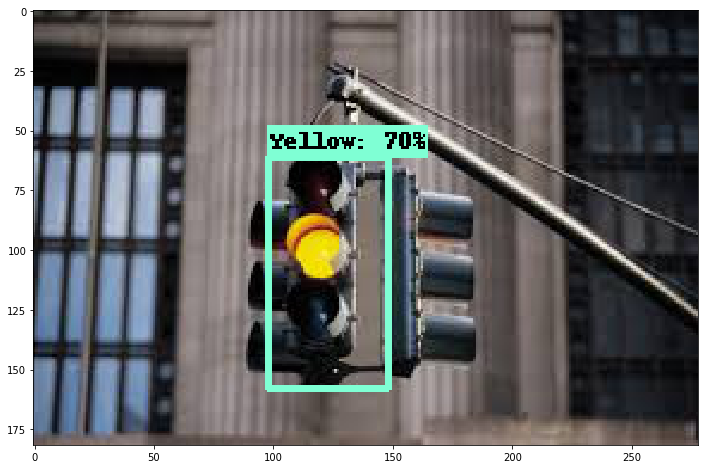

('Yellow', 0.700788)
('ms', 11.937856674194336, '\n')


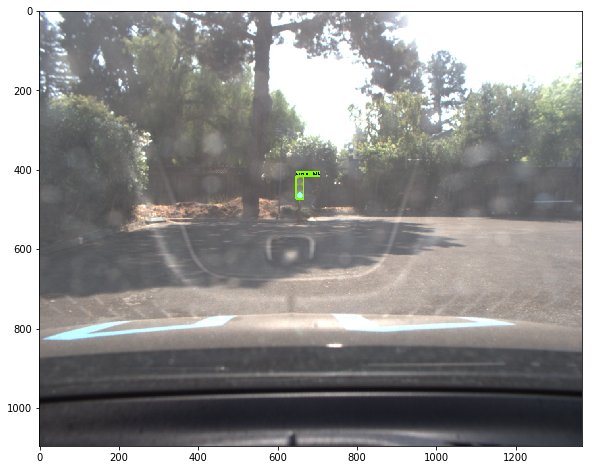

('Green', 0.9997749)
('ms', 13.312101364135742, '\n')


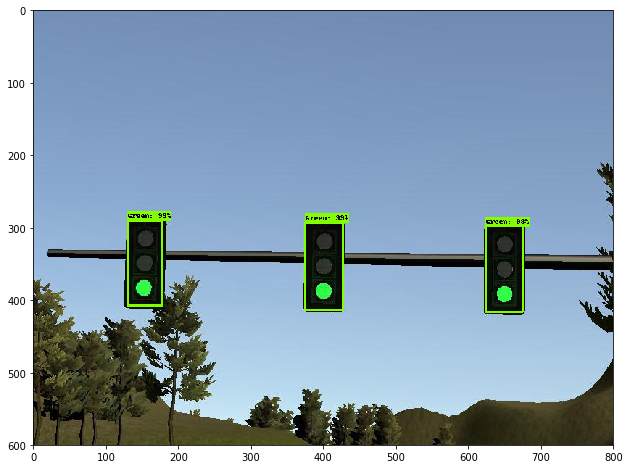

('Green', 0.9986916)
('ms', 12.722015380859375, '\n')
('Green', 0.9968484)
('ms', 12.722015380859375, '\n')
('Green', 0.9873362)
('ms', 12.722015380859375, '\n')


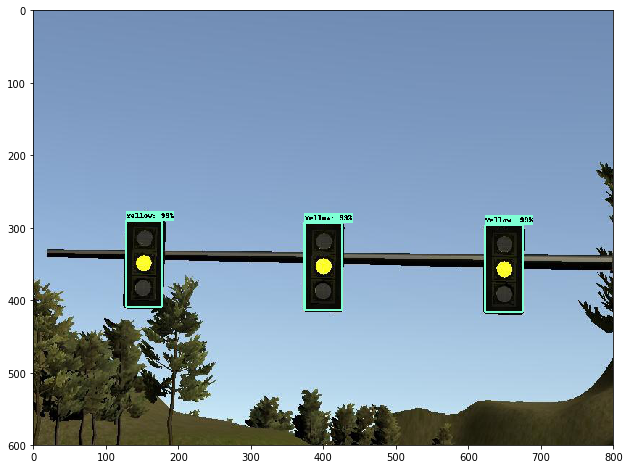

('Yellow', 0.9983778)
('ms', 12.833118438720703, '\n')
('Yellow', 0.99673164)
('ms', 12.833118438720703, '\n')
('Yellow', 0.99491197)
('ms', 12.833118438720703, '\n')


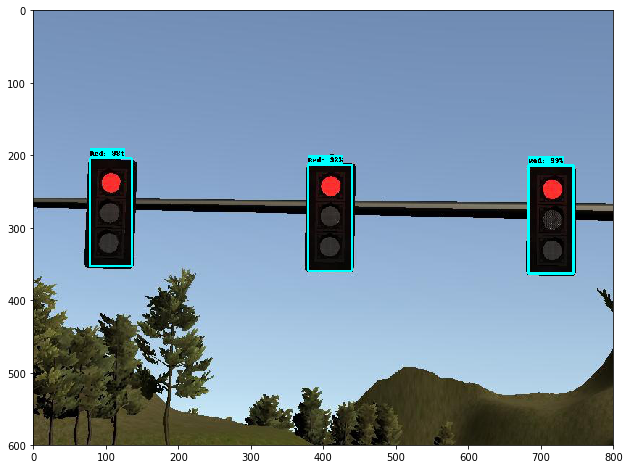

('Red', 0.99446684)
('ms', 13.635873794555664, '\n')
('Red', 0.9896291)
('ms', 13.635873794555664, '\n')
('Red', 0.92658967)
('ms', 13.635873794555664, '\n')


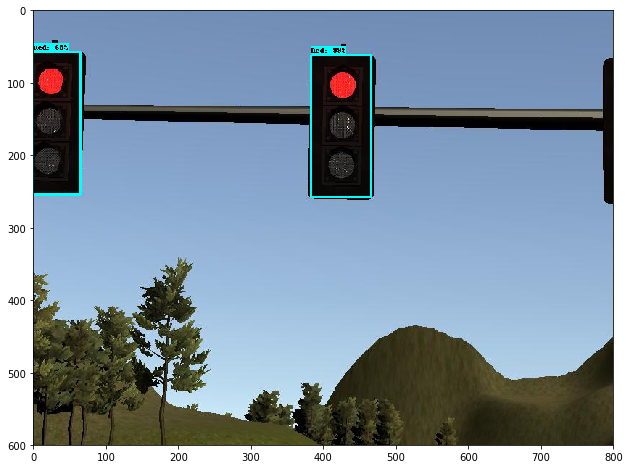

('Red', 0.9995778)
('ms', 12.515068054199219, '\n')
('Red', 0.65318024)
('ms', 12.515068054199219, '\n')


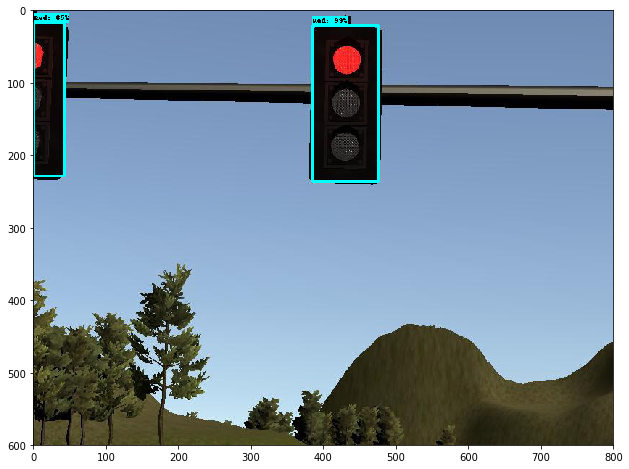

('Red', 0.9996357)
('ms', 12.421846389770508, '\n')
('Red', 0.65208447)
('ms', 12.421846389770508, '\n')


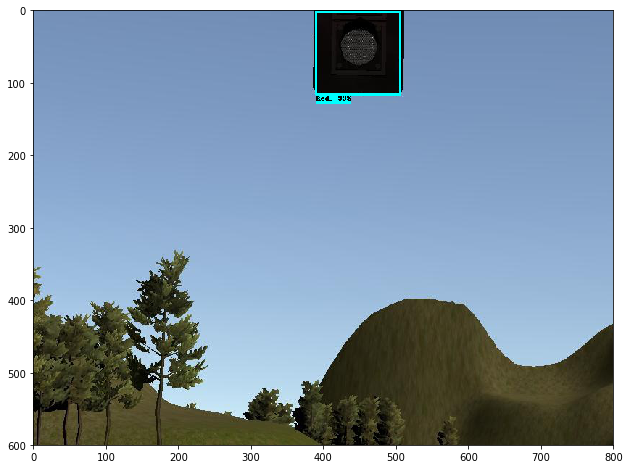

('Red', 0.9924036)
('ms', 12.46786117553711, '\n')


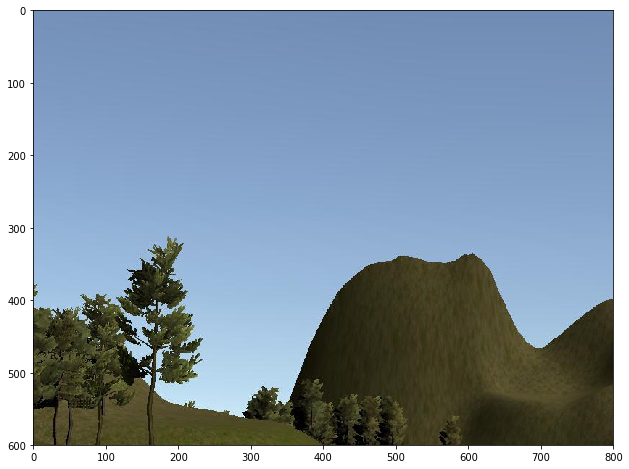

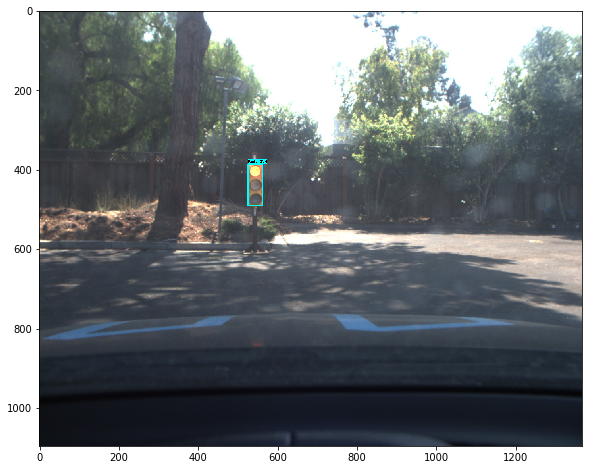

('Red', 0.9998938)
('ms', 13.463020324707031, '\n')


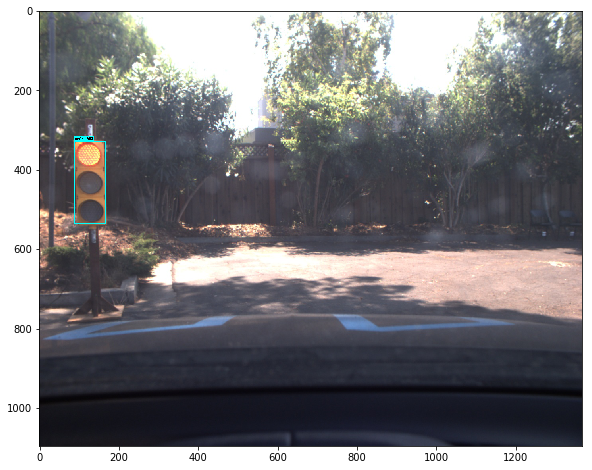

('Red', 0.9961279)
('ms', 16.396045684814453, '\n')


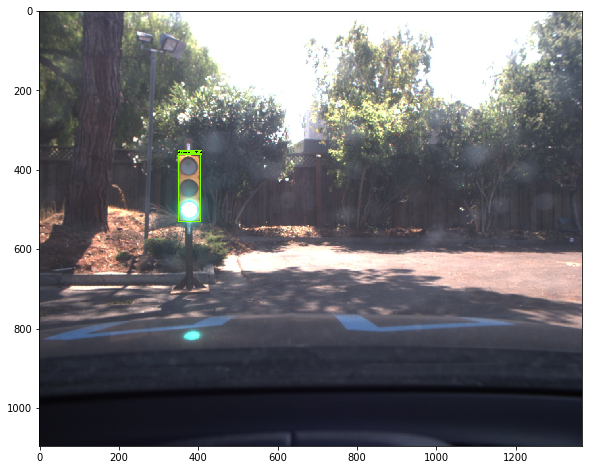

('Green', 0.999684)
('ms', 14.400005340576172, '\n')


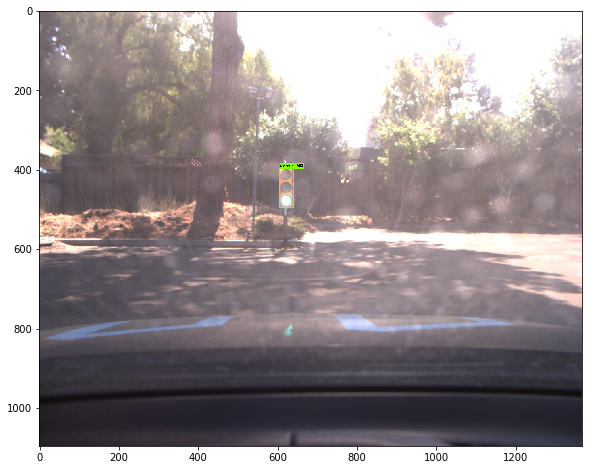

('Green', 0.99992466)
('ms', 13.589143753051758, '\n')


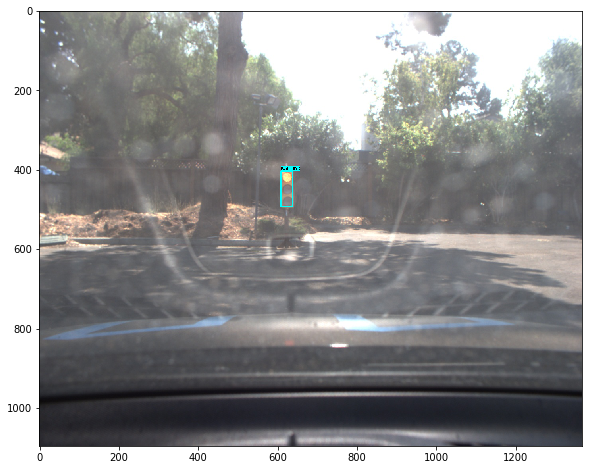

('Red', 0.99992216)
('ms', 13.291120529174805, '\n')


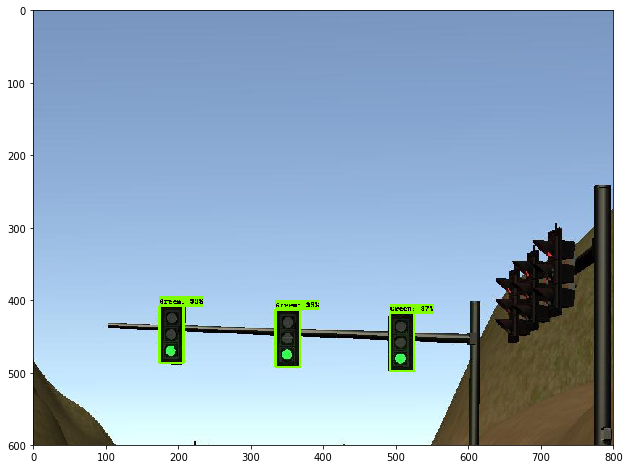

('Green', 0.99977535)
('ms', 13.679981231689453, '\n')
('Green', 0.9991015)
('ms', 13.679981231689453, '\n')
('Green', 0.87089765)
('ms', 13.679981231689453, '\n')


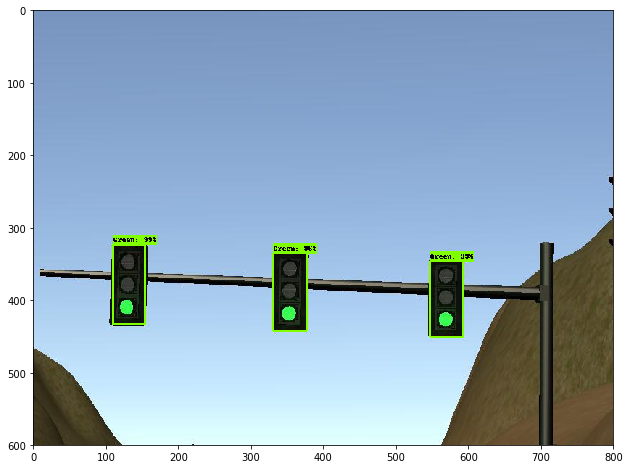

('Green', 0.99989307)
('ms', 14.050006866455078, '\n')
('Green', 0.9986987)
('ms', 14.050006866455078, '\n')
('Green', 0.9660701)
('ms', 14.050006866455078, '\n')


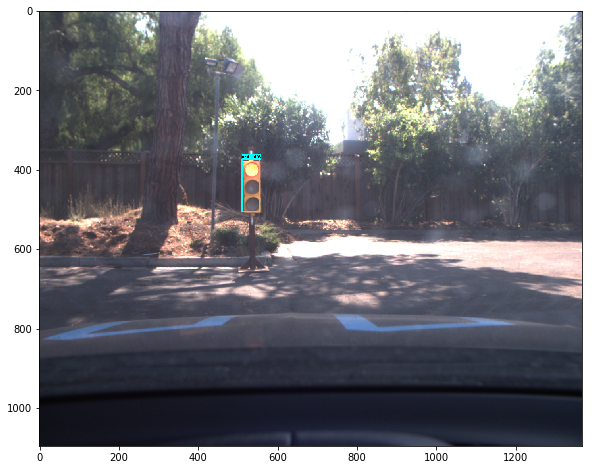

('Red', 0.9997869)
('ms', 13.200998306274414, '\n')


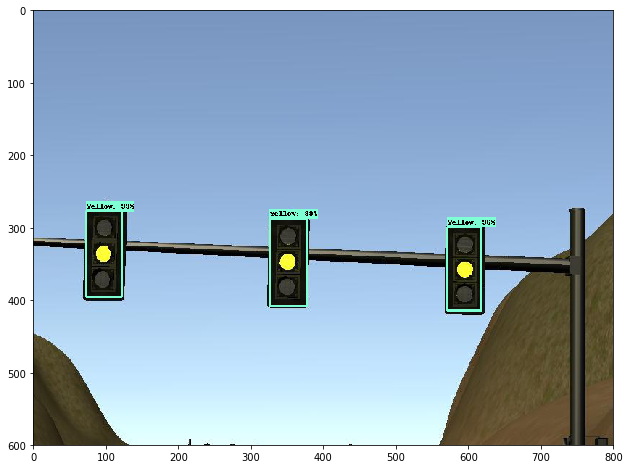

('Yellow', 0.9983475)
('ms', 12.598037719726562, '\n')
('Yellow', 0.9979259)
('ms', 12.598037719726562, '\n')
('Yellow', 0.9684028)
('ms', 12.598037719726562, '\n')


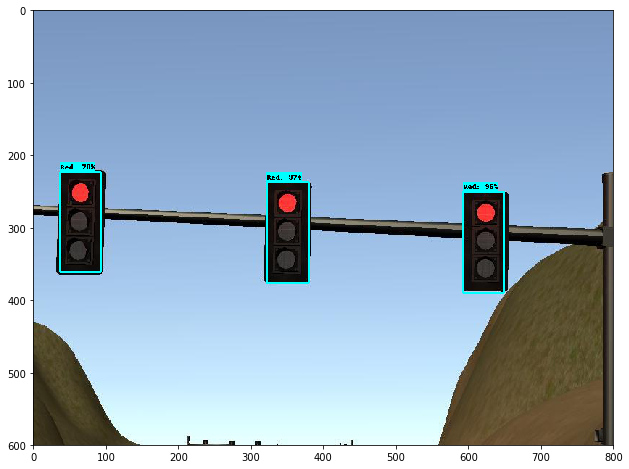

('Red', 0.9787309)
('ms', 12.25900650024414, '\n')
('Red', 0.96893513)
('ms', 12.25900650024414, '\n')
('Red', 0.7022669)
('ms', 12.25900650024414, '\n')


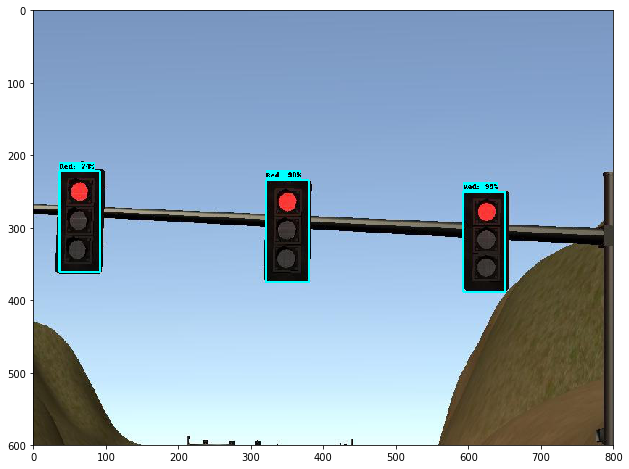

('Red', 0.98591983)
('ms', 12.197017669677734, '\n')
('Red', 0.95083225)
('ms', 12.197017669677734, '\n')
('Red', 0.7462311)
('ms', 12.197017669677734, '\n')


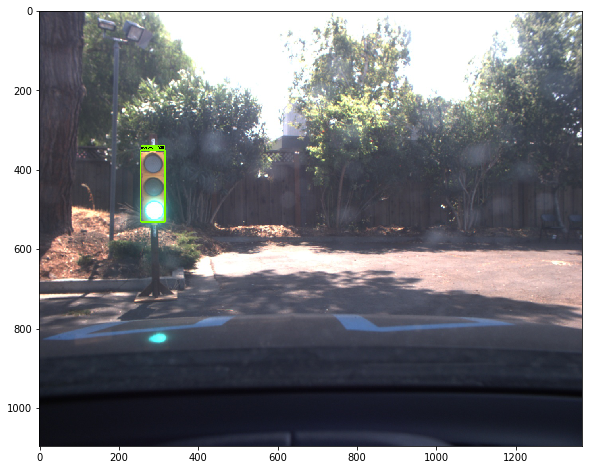

('Green', 0.8227763)
('ms', 16.208887100219727, '\n')


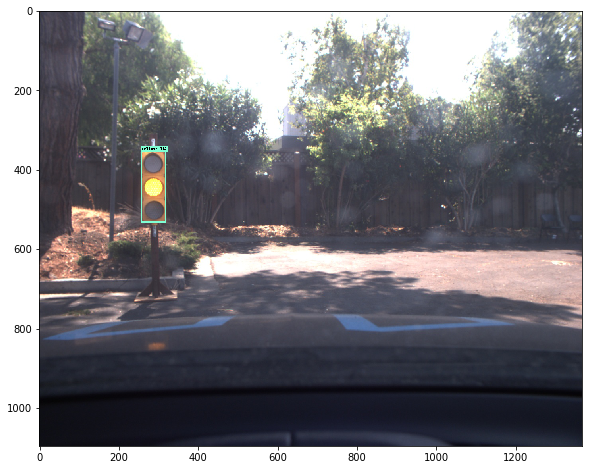

('Yellow', 0.7844547)
('ms', 13.956069946289062, '\n')


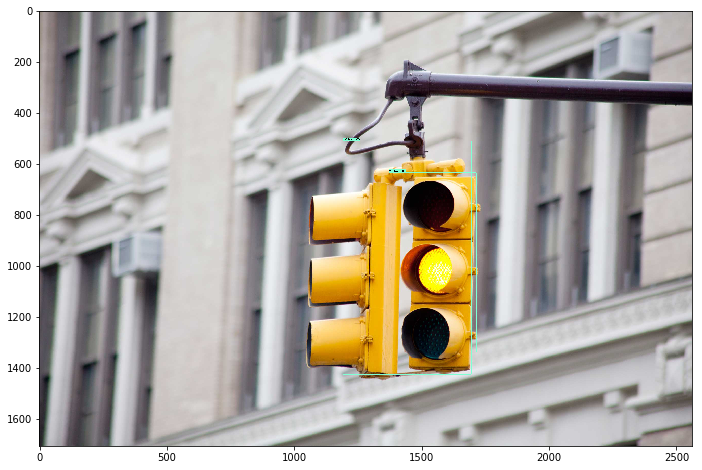

('Yellow', 0.9614314)
('ms', 15.624046325683594, '\n')
('Yellow', 0.42564815)
('ms', 15.624046325683594, '\n')


In [9]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        def eval_an_image(image_path):
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            ret = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})
            
            time1 = time.time()
            return ret, image_np, time1 - time0

        tot_time_elapsed = 0.
        for image_path in TEST_IMAGE_PATHS:
            (boxes, scores, classes, num), image_np, time_elapsed = eval_an_image(image_path)
            tot_time_elapsed += time_elapsed
            
            draw_a_detection_result(boxes, scores, classes, num, image_np, time_elapsed)   
            
            if not os.path.exists(EVAL_IMAGES_DIR):
                os.makedirs(EVAL_IMAGES_DIR)
                
            Image.fromarray(image_np).save(EVAL_IMAGES_DIR + '/' + os.path.basename(image_path))